In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
import os

In [3]:
# set directory
path = os.getcwd()

# get dataframe
df, target, _ = utils.get_data()

C:\Users\rasmu\PycharmProjects\inflation_forecasting\utils.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformations[target_col] = target_col_transformation


In [4]:
# load model metrics
metrics_df = pd.read_csv('zero_to_one_MinMaxScaler_metrics.csv', sep=';', index_col=0)
metrics_df.sort_values('Test Score', inplace=True)
metrics_df

,Train Score,Validation Score,Test Score,Mean Absolute Error
cnn_lstm,0.1108,1.5323,0.8011,0.7581
multi_layer_gru,0.2254,1.1794,0.8916,0.7814
one_layer_cnn,0.1326,3.3795,2.5595,1.4076
multi_layer_cnn,0.2214,3.0847,3.2555,1.6110
multi_layer_lstm,0.3340,5.7124,4.5818,1.9609
multi_layer_ff,0.2815,7.5712,4.8209,1.9514
one_layer_ff,0.4136,6.0927,5.8399,2.1832
one_layer_gru,0.4434,8.5167,7.8453,2.5440
one_layer_lstm,0.4904,8.5296,8.1967,2.6216


##### NOTE: At times the data set is not updated with the macroeconomic variables from the previous month, but instead with 2 months old observations. In this case, the actual number that is the aim of the prediction is already available. 


In [5]:
# load predictions
predictions_df = pd.read_csv('zero_to_one_MinMaxScaler_predictions.csv', sep=';', index_col=0)
predictions_df = predictions_df.reindex(metrics_df.index)
predictions_df

,Prediction
cnn_lstm,6.489147
multi_layer_gru,6.142436
one_layer_cnn,6.082740
multi_layer_cnn,6.854693
multi_layer_lstm,5.977817
multi_layer_ff,6.845508
one_layer_ff,6.811389
one_layer_gru,6.077316
one_layer_lstm,5.990241


In [6]:
# reindex target
new_index = pd.date_range(target.index[0], target.index[-1]+pd.Timedelta(days=31), freq='MS')
target = pd.Series(target).reindex(new_index, fill_value=np.nan)*100

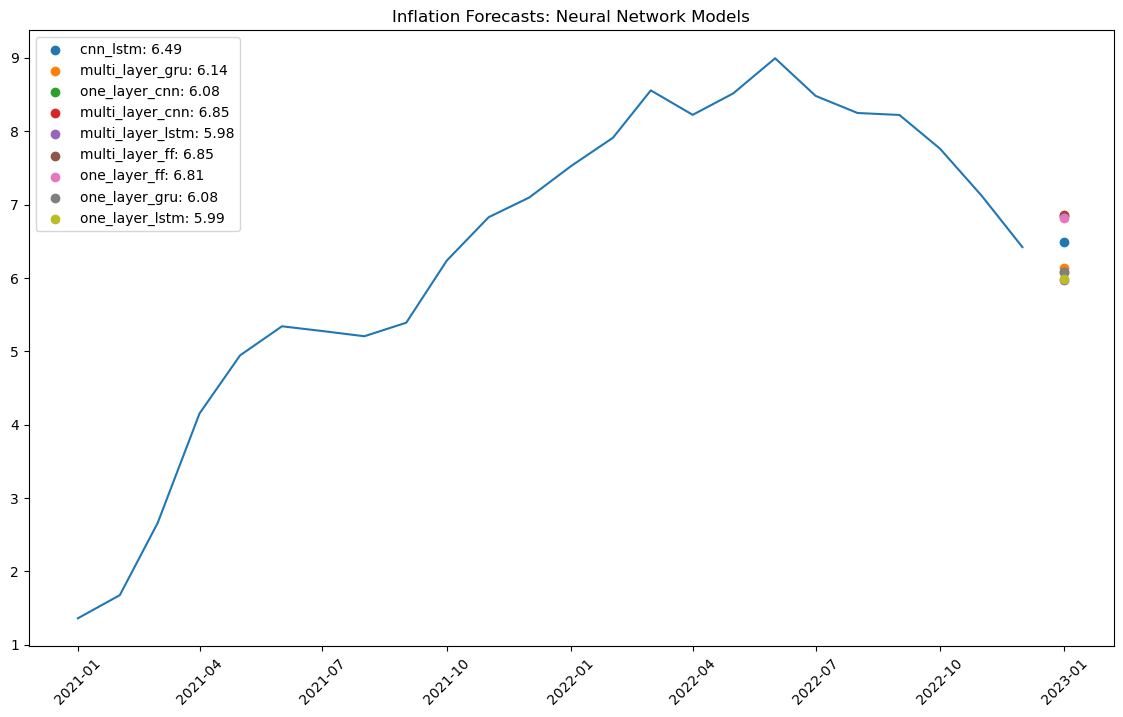

In [9]:
# plot figure with target values and predictions
fig = plt.figure(figsize=(14,8))
plt.plot(target['2021-01-01':])
plt.title('Inflation Forecasts: Neural Network Models')
for i in range(len(predictions_df)):
    plt.scatter(target.index[-1], 
                predictions_df['Prediction'][i], 
                label=f"{predictions_df.index[i]}: {round(predictions_df['Prediction'][i],2)}")
plt.xticks(rotation=45)
plt.legend()
plt.savefig("oos_predictions", dpi=fig.dpi)
plt.show()

In [8]:
# ensemble forecast of top 5 models
ensemble_forecast = predictions_df.iloc[0:5].mean()
ensemble_forecast

Prediction    6.309366
dtype: float64